In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('https://github.com/MinhGioChai/Data-Visualization/raw/refs/heads/main/raw_data/train.csv')
print(f'Shape: {df.shape[0]} rows, {df.shape[1]} columns')

Shape: 215258 rows, 75 columns


## **Random Forest**

In [8]:
sns.set_style("whitegrid", {"axes.grid": False})

📊 Dataset Shape: 22624 rows, 75 columns
📊 Using 62 numeric features

⚖️ Class distribution after SMOTE:
TARGET
0    16899
1    16899
Name: count, dtype: int64

🌲 Training Random Forest...
✅ Model training complete!

🔢 Prediction Counts (Test Set):
0    4420
1     105
Name: count, dtype: int64

📌 RANDOM FOREST PERFORMANCE
Metric               Train                Test                
------------------------------------------------------------
Accuracy             0.9842               0.9193              
ROC-AUC              0.9961               0.7007              
F1-Score             0.8783               0.0988              
Precision            0.8974               0.1905              
Recall               0.8600               0.0667              

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4225
           1       0.19      0.07      0.10       300

    accuracy                         

C:\Users\tt\AppData\Local\Temp\ipykernel_17536\647519366.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='importance', palette='viridis', ax=ax1)


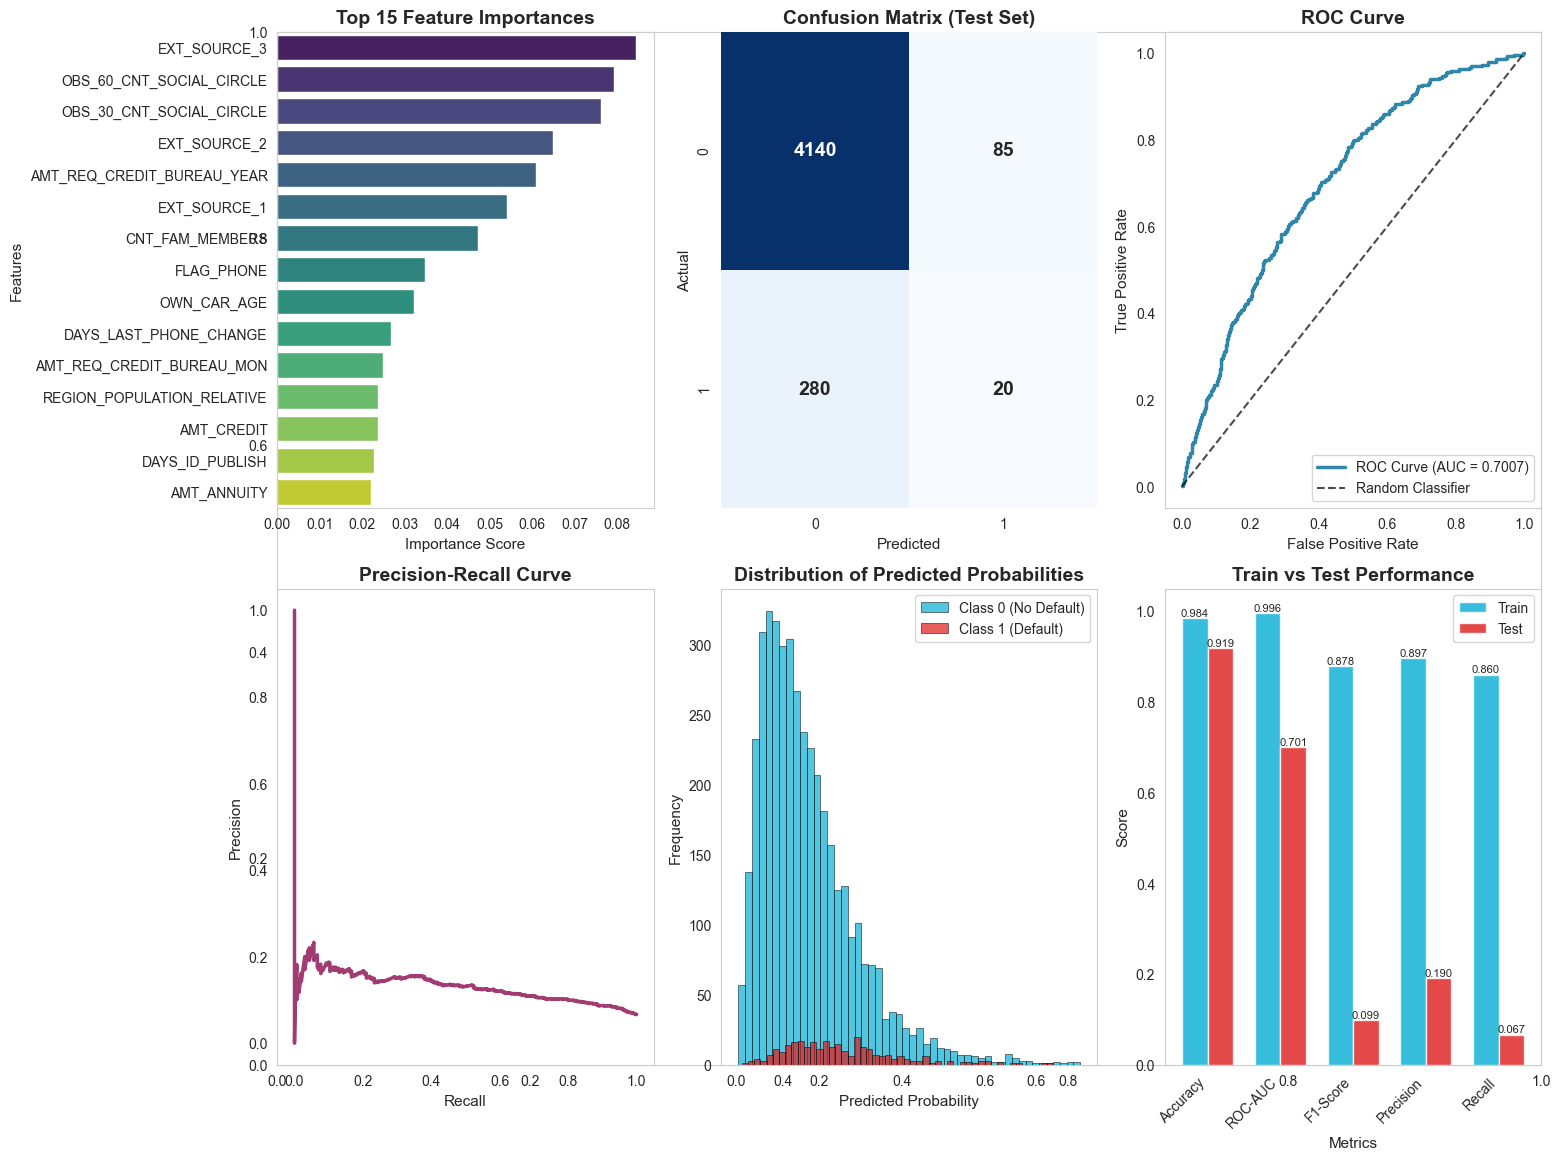


🎯 MODEL SUMMARY
   Model Type         : Random Forest Classifier
   Number of Trees    : 200
   Max Depth          : 20
   Min Samples Split  : 5
   Min Samples Leaf   : 2
   Max Features       : sqrt
   Training Samples   : 33,798
   Test Samples       : 4,525
   Number of Features : 62


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve, precision_recall_curve, 
                             f1_score, precision_score, recall_score)
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Data preparation
df = df.copy()
df = df.dropna()
print(f'📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns')

# Features and target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Select only numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X = X[numeric_cols]
print(f'📊 Using {len(numeric_cols)} numeric features')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n⚖️ Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# ========================================
# Train Random Forest Model
# ========================================
print("\n🌲 Training Random Forest...")
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_smote, y_train_smote)
print("✅ Model training complete!")

# ========================================
# Predictions
# ========================================
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

print("\n🔢 Prediction Counts (Test Set):")
print(pd.Series(y_test_pred).value_counts())

# ========================================
# Evaluation Metrics
# ========================================
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print("\n" + "="*60)
print("📌 RANDOM FOREST PERFORMANCE")
print("="*60)
print(f"{'Metric':<20} {'Train':<20} {'Test':<20}")
print("-"*60)
print(f"{'Accuracy':<20} {train_acc:<20.4f} {test_acc:<20.4f}")
print(f"{'ROC-AUC':<20} {train_auc:<20.4f} {test_auc:<20.4f}")
print(f"{'F1-Score':<20} {train_f1:<20.4f} {test_f1:<20.4f}")
print(f"{'Precision':<20} {train_precision:<20.4f} {test_precision:<20.4f}")
print(f"{'Recall':<20} {train_recall:<20.4f} {test_recall:<20.4f}")
print("="*60)

print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# ========================================
# Feature Importance
# ========================================
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🎯 Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# ========================================
# VISUALIZATIONS
# ========================================

# Set style
fig = plt.figure(figsize=(16, 12))
plt.grid(False)
# 1. Feature Importance Plot
ax1 = plt.subplot(2, 3, 1)
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis', ax=ax1)
ax1.set_title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
ax1.set_xlabel('Importance Score', fontsize=11)
ax1.set_ylabel('Features', fontsize=11)

# 2. Confusion Matrix
ax2 = plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2,
            annot_kws={'size': 14, 'weight': 'bold'})
ax2.set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=11)
ax2.set_xlabel('Predicted', fontsize=11)

# 3. ROC Curve
ax3 = plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
ax3.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.4f})', linewidth=2.5, color='#2E86AB')
ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1.5, alpha=0.7)
ax3.set_xlabel('False Positive Rate', fontsize=11)
ax3.set_ylabel('True Positive Rate', fontsize=11)
ax3.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax3.legend(loc='lower right', fontsize=10)

# 4. Precision-Recall Curve
ax4 = plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
ax4.plot(recall, precision, linewidth=2.5, color='#A23B72')
ax4.set_xlabel('Recall', fontsize=11)
ax4.set_ylabel('Precision', fontsize=11)
ax4.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')

# 5. Prediction Probability Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(y_test_proba[y_test == 0], bins=50, alpha=0.7, label='Class 0 (No Default)', 
         color='#06AED5', edgecolor='black', linewidth=0.5)
ax5.hist(y_test_proba[y_test == 1], bins=50, alpha=0.7, label='Class 1 (Default)', 
         color='#DD1C1A', edgecolor='black', linewidth=0.5)
ax5.set_xlabel('Predicted Probability', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)

# 6. Performance Metrics Comparison
ax6 = plt.subplot(2, 3, 6)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'F1-Score', 'Precision', 'Recall'],
    'Train': [train_acc, train_auc, train_f1, train_precision, train_recall],
    'Test': [test_acc, test_auc, test_f1, test_precision, test_recall]
})
x = np.arange(len(metrics_df))
width = 0.35
bars1 = ax6.bar(x - width/2, metrics_df['Train'], width, label='Train', color='#06AED5', alpha=0.8)
bars2 = ax6.bar(x + width/2, metrics_df['Test'], width, label='Test', color='#DD1C1A', alpha=0.8)
ax6.set_xlabel('Metrics', fontsize=11)
ax6.set_ylabel('Score', fontsize=11)
ax6.set_title('Train vs Test Performance', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics_df['Metric'], rotation=45, ha='right')
ax6.legend(fontsize=10)
ax6.set_ylim([0, 1.05])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# ========================================
# Model Summary
# ========================================
print("\n" + "="*60)
print("🎯 MODEL SUMMARY")
print("="*60)
print(f"   Model Type         : Random Forest Classifier")
print(f"   Number of Trees    : {model.n_estimators}")
print(f"   Max Depth          : {model.max_depth}")
print(f"   Min Samples Split  : {model.min_samples_split}")
print(f"   Min Samples Leaf   : {model.min_samples_leaf}")
print(f"   Max Features       : {model.max_features}")
print(f"   Training Samples   : {X_train_smote.shape[0]:,}")
print(f"   Test Samples       : {X_test.shape[0]:,}")
print(f"   Number of Features : {X.shape[1]}")
print("="*60)

## **XGBoost**

📊 Dataset Shape: 22624 rows, 75 columns
Class distribution after SMOTE:
TARGET
0    16912
1    16912
Name: count, dtype: int64

🚀 Training XGBoost...
✅ Model training complete!

🔢 Prediction Counts (Test Set):
0    4508
1      17
Name: count, dtype: int64

📌 XGBOOST PERFORMANCE
Metric               Train                Test                
------------------------------------------------------------
Accuracy             0.9498               0.9310              
ROC-AUC              0.9814               0.7436              
F1-Score             0.3812               0.0545              
Precision            0.9929               0.5294              
Recall               0.2359               0.0288              

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4212
           1       0.53      0.03      0.05       313

    accuracy                           0.93      4525
   macro avg       0.73    

C:\Users\tt\AppData\Local\Temp\ipykernel_17536\1664042901.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='importance', palette='viridis', ax=ax1)


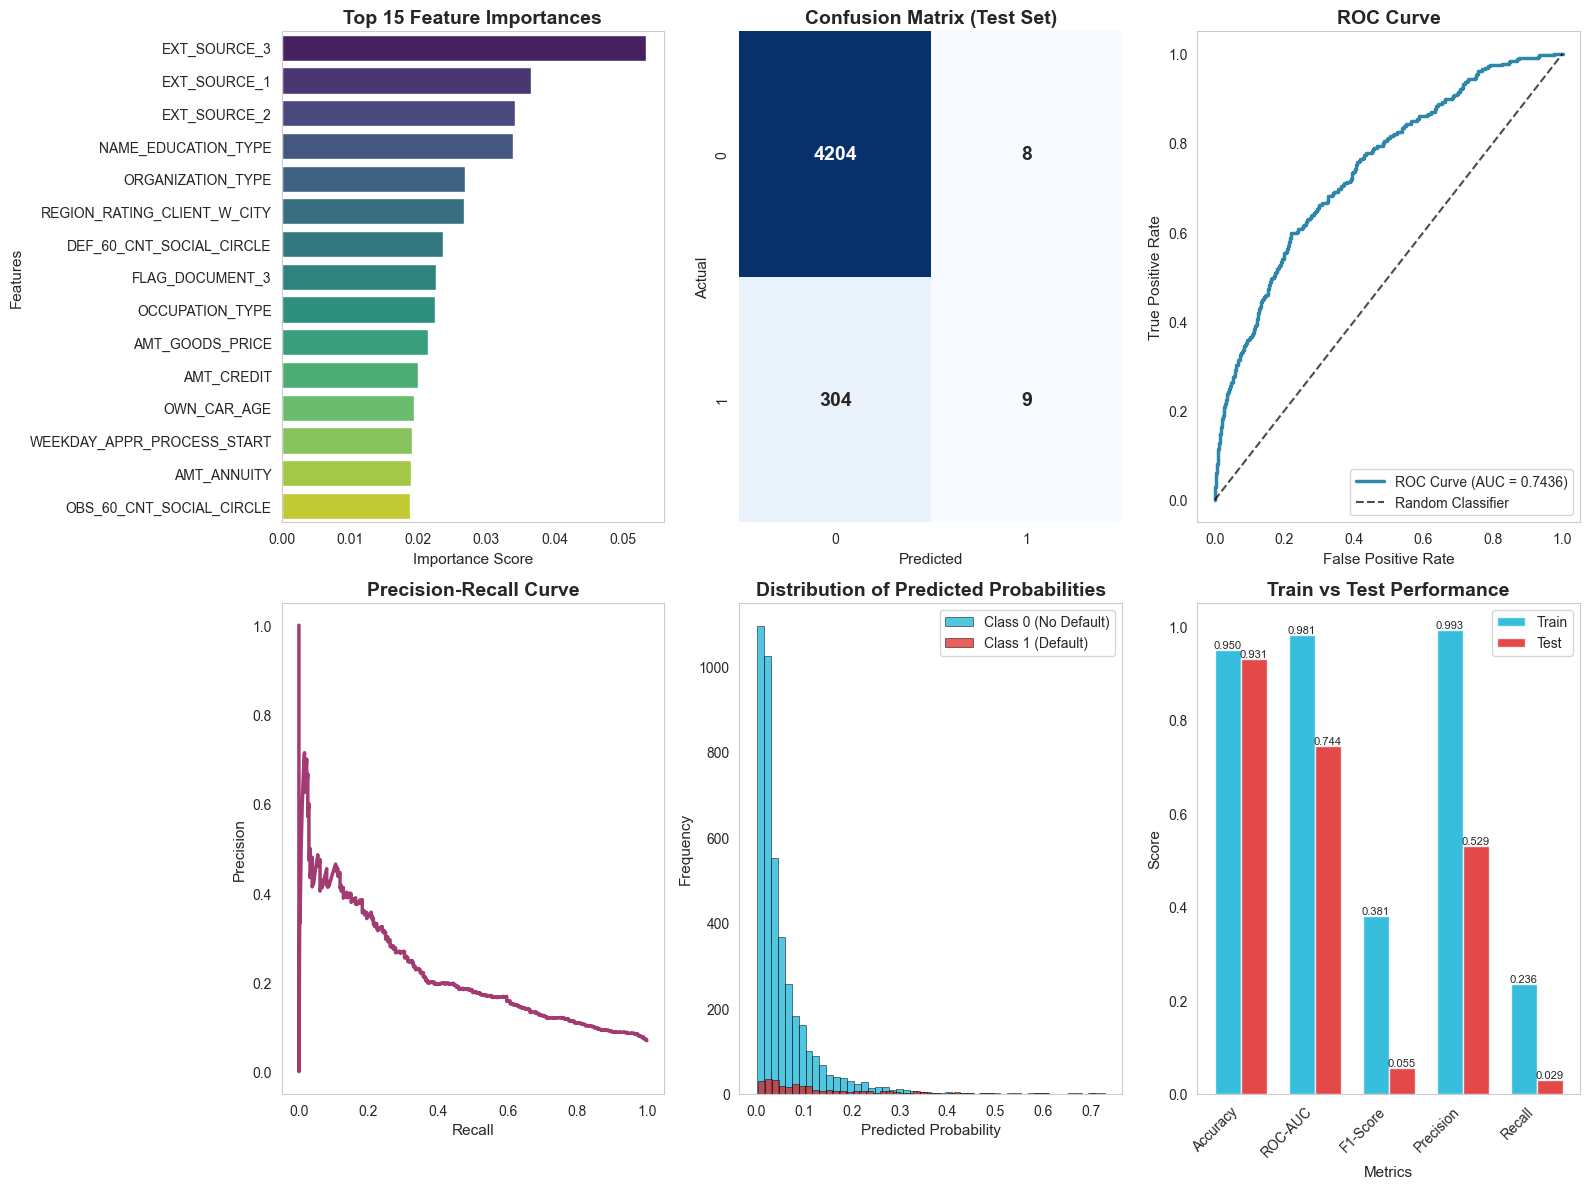


🎯 MODEL SUMMARY
   Model Type         : XGBoost Classifier
   Number of Trees    : 300
   Max Depth          : 5
   Learning Rate      : 0.05
   Subsample          : 0.9
   Colsample by Tree  : 0.9
   Training Samples   : 18,099
   Test Samples       : 4,525
   Number of Features : 74


In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve,
                             f1_score, precision_score, recall_score)
from imblearn.over_sampling import SMOTENC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Prepare data
# ---------------------------
df = df.copy()

print(f'📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns')

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Convert all object columns to category
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE to balance the training data
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype.name == 'category']
smote = SMOTENC(categorical_features=cat_features, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

model = xgb.XGBClassifier(
    enable_categorical=True,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    random_state=42
)

# Train
model.fit(X_train_smote, y_train_smote)
# ---------------------------
# 2. XGBoost Model
# ---------------------------
print("\n🚀 Training XGBoost...")
model = xgb.XGBClassifier(
    enable_categorical=True,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    random_state=42
)

# Train
model.fit(X_train, y_train)
print("✅ Model training complete!")

# ---------------------------
# 3. Predictions
# ---------------------------
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

print("\n🔢 Prediction Counts (Test Set):")
print(pd.Series(y_test_pred).value_counts())

# ---------------------------
# 4. Evaluation Metrics
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print("\n" + "="*60)
print("📌 XGBOOST PERFORMANCE")
print("="*60)
print(f"{'Metric':<20} {'Train':<20} {'Test':<20}")
print("-"*60)
print(f"{'Accuracy':<20} {train_acc:<20.4f} {test_acc:<20.4f}")
print(f"{'ROC-AUC':<20} {train_auc:<20.4f} {test_auc:<20.4f}")
print(f"{'F1-Score':<20} {train_f1:<20.4f} {test_f1:<20.4f}")
print(f"{'Precision':<20} {train_precision:<20.4f} {test_precision:<20.4f}")
print(f"{'Recall':<20} {train_recall:<20.4f} {test_recall:<20.4f}")
print("="*60)

print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# ---------------------------
# 5. Feature Importance
# ---------------------------
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🎯 Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# ========================================
# VISUALIZATIONS
# ========================================

fig = plt.figure(figsize=(16, 12))

# 1. Feature Importance Plot
ax1 = plt.subplot(2, 3, 1)
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis', ax=ax1)
ax1.set_title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
ax1.set_xlabel('Importance Score', fontsize=11)
ax1.set_ylabel('Features', fontsize=11)

# 2. Confusion Matrix
ax2 = plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2,
            annot_kws={'size': 14, 'weight': 'bold'})
ax2.set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=11)
ax2.set_xlabel('Predicted', fontsize=11)

# 3. ROC Curve
ax3 = plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
ax3.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.4f})', linewidth=2.5, color='#2E86AB')
ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1.5, alpha=0.7)
ax3.set_xlabel('False Positive Rate', fontsize=11)
ax3.set_ylabel('True Positive Rate', fontsize=11)
ax3.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax3.legend(loc='lower right', fontsize=10)

# 4. Precision-Recall Curve
ax4 = plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
ax4.plot(recall, precision, linewidth=2.5, color='#A23B72')
ax4.set_xlabel('Recall', fontsize=11)
ax4.set_ylabel('Precision', fontsize=11)
ax4.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')

# 5. Prediction Probability Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(y_test_proba[y_test == 0], bins=50, alpha=0.7, label='Class 0 (No Default)', 
         color='#06AED5', edgecolor='black', linewidth=0.5)
ax5.hist(y_test_proba[y_test == 1], bins=50, alpha=0.7, label='Class 1 (Default)', 
         color='#DD1C1A', edgecolor='black', linewidth=0.5)
ax5.set_xlabel('Predicted Probability', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)

# 6. Performance Metrics Comparison
ax6 = plt.subplot(2, 3, 6)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'F1-Score', 'Precision', 'Recall'],
    'Train': [train_acc, train_auc, train_f1, train_precision, train_recall],
    'Test': [test_acc, test_auc, test_f1, test_precision, test_recall]
})
x = np.arange(len(metrics_df))
width = 0.35
bars1 = ax6.bar(x - width/2, metrics_df['Train'], width, label='Train', color='#06AED5', alpha=0.8)
bars2 = ax6.bar(x + width/2, metrics_df['Test'], width, label='Test', color='#DD1C1A', alpha=0.8)
ax6.set_xlabel('Metrics', fontsize=11)
ax6.set_ylabel('Score', fontsize=11)
ax6.set_title('Train vs Test Performance', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics_df['Metric'], rotation=45, ha='right')
ax6.legend(fontsize=10)
ax6.set_ylim([0, 1.05])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# ========================================
# Model Summary
# ========================================
print("\n" + "="*60)
print("🎯 MODEL SUMMARY")
print("="*60)
print(f"   Model Type         : XGBoost Classifier")
print(f"   Number of Trees    : {model.n_estimators}")
print(f"   Max Depth          : {model.max_depth}")
print(f"   Learning Rate      : {model.learning_rate}")
print(f"   Subsample          : {model.subsample}")
print(f"   Colsample by Tree  : {model.colsample_bytree}")
print(f"   Training Samples   : {X_train.shape[0]:,}")
print(f"   Test Samples       : {X_test.shape[0]:,}")
print(f"   Number of Features : {X.shape[1]}")
print("="*60)

## **Logistic Regression**

📊 Dataset Shape: 22624 rows, 75 columns
📊 Using 62 numeric features

⚖️ Applying SMOTE to balance classes...
Training samples after SMOTE: 33,798

📈 Training Logistic Regression...


c:\Users\tt\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tt\AppData\Local\Temp\ipykernel_17536\2025066125.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='coefficient', palette=colors, ax=ax1)


✅ Model training complete!

🔢 Prediction Counts (Test Set):
0    2717
1    1808
Name: count, dtype: int64

📌 LOGISTIC REGRESSION PERFORMANCE
Metric               Train                Test                
------------------------------------------------------------
Accuracy             0.5962               0.6097              
ROC-AUC              0.6115               0.6203              
F1-Score             0.1518               0.1622              
Precision            0.0882               0.0946              
Recall               0.5450               0.5700              

🔹 TRAIN PERFORMANCE - Per Class
  Class 0 - Precision: 0.9489, Recall: 0.5999, F1: 0.7350
  Class 1 - Precision: 0.0882, Recall: 0.5450, F1: 0.1518

🔹 TEST PERFORMANCE - Per Class
  Class 0 - Precision: 0.9525, Recall: 0.6125, F1: 0.7456
  Class 1 - Precision: 0.0946, Recall: 0.5700, F1: 0.1622

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.

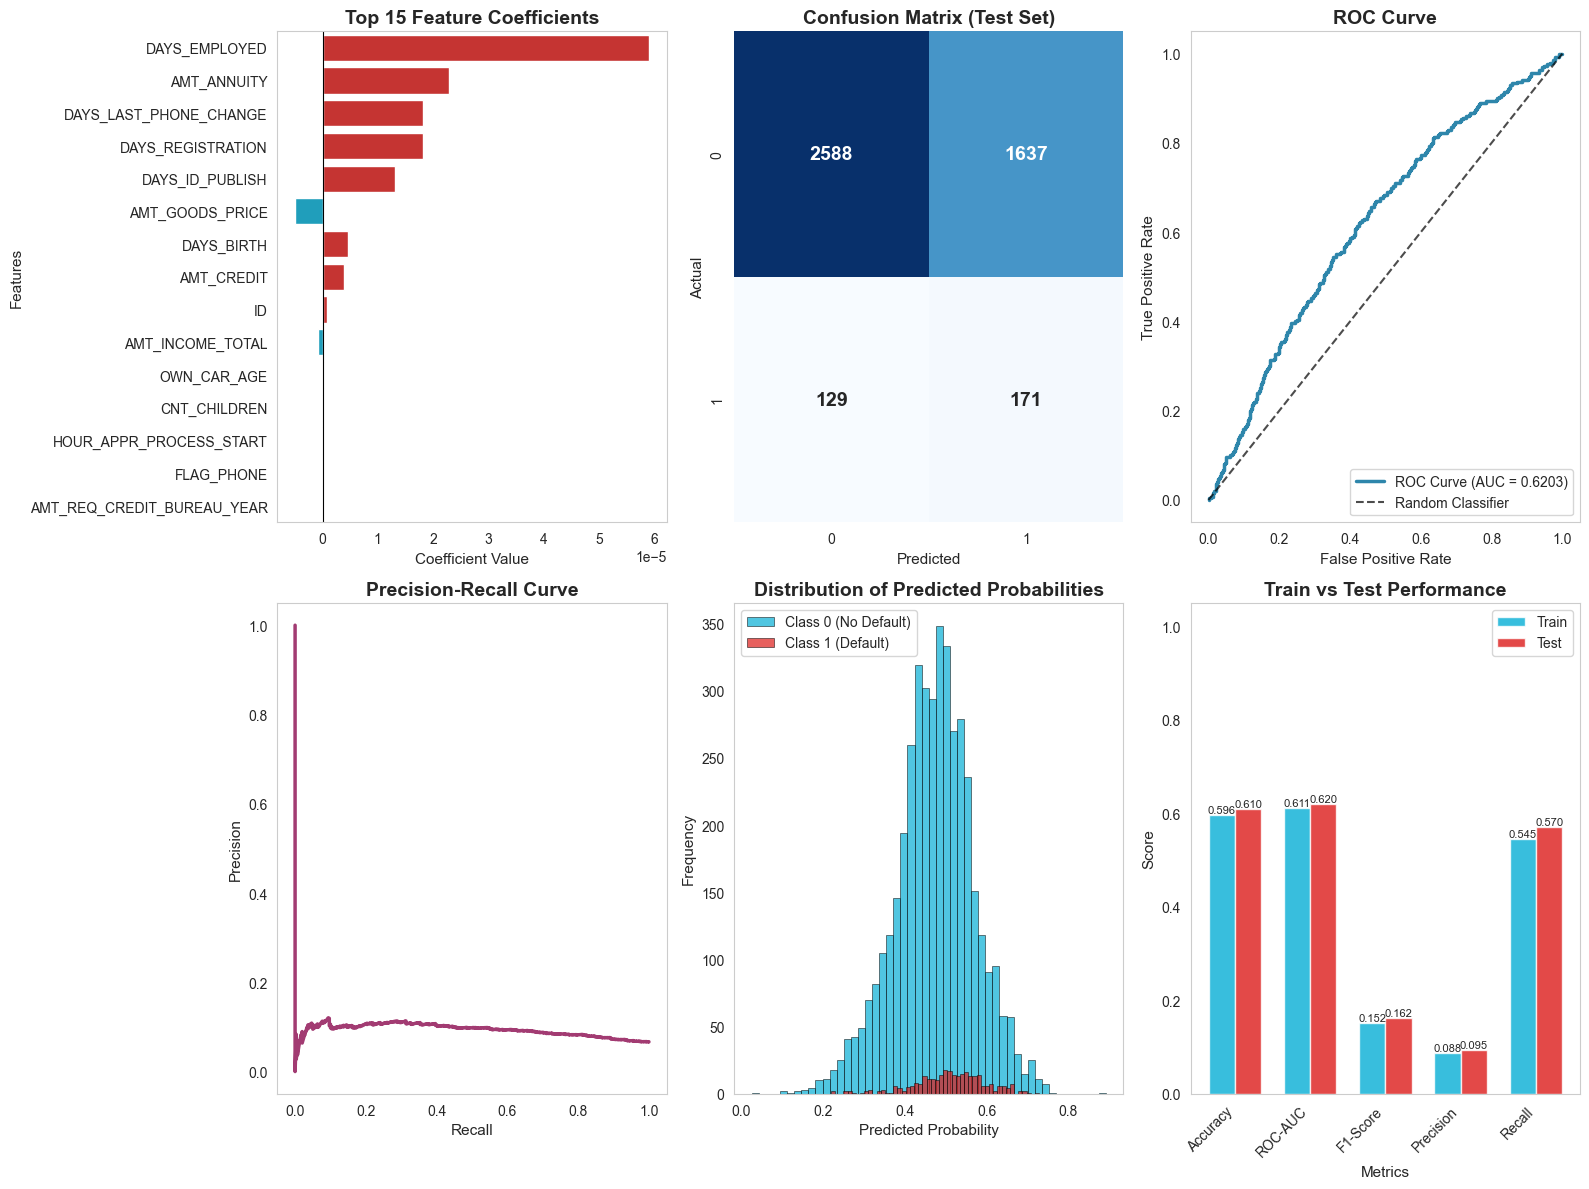


🎯 MODEL SUMMARY
   Model Type         : Logistic Regression
   Solver             : saga
   Max Iterations     : 1000
   Class Weight       : balanced
   Training Samples   : 33,798
   Test Samples       : 4,525
   Number of Features : 62


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, 
                             confusion_matrix, precision_score, recall_score, f1_score,
                             roc_curve, precision_recall_curve)
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Prepare data
# ---------------------------
df = df.copy()
df = df.dropna()

print(f'📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns')

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Select only numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X = X[numeric_cols]
print(f'📊 Using {len(numeric_cols)} numeric features')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
print("\n⚖️ Applying SMOTE to balance classes...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Training samples after SMOTE: {X_train_smote.shape[0]:,}")

# ---------------------------
# 2. Logistic Regression Pipeline
# ---------------------------
print("\n📈 Training Logistic Regression...")
clf = Pipeline(steps=[
    ('clf', LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1, class_weight='balanced'))
])

# Train the model
clf.fit(X_train_smote, y_train_smote)
print("✅ Model training complete!")

# ---------------------------
# 3. Predictions
# ---------------------------
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)[:, 1]

y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)[:, 1]

print("\n🔢 Prediction Counts (Test Set):")
print(pd.Series(y_test_pred).value_counts())

# ---------------------------
# 4. Evaluation Metrics
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print("\n" + "="*60)
print("📌 LOGISTIC REGRESSION PERFORMANCE")
print("="*60)
print(f"{'Metric':<20} {'Train':<20} {'Test':<20}")
print("-"*60)
print(f"{'Accuracy':<20} {train_acc:<20.4f} {test_acc:<20.4f}")
print(f"{'ROC-AUC':<20} {train_auc:<20.4f} {test_auc:<20.4f}")
print(f"{'F1-Score':<20} {train_f1:<20.4f} {test_f1:<20.4f}")
print(f"{'Precision':<20} {train_precision:<20.4f} {test_precision:<20.4f}")
print(f"{'Recall':<20} {train_recall:<20.4f} {test_recall:<20.4f}")
print("="*60)

# Detailed per-class metrics
print("\n🔹 TRAIN PERFORMANCE - Per Class")
print(f"  Class 0 - Precision: {precision_score(y_train, y_train_pred, pos_label=0):.4f}, "
      f"Recall: {recall_score(y_train, y_train_pred, pos_label=0):.4f}, "
      f"F1: {f1_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"  Class 1 - Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}, "
      f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}, "
      f"F1: {f1_score(y_train, y_train_pred, pos_label=1):.4f}")

print("\n🔹 TEST PERFORMANCE - Per Class")
print(f"  Class 0 - Precision: {precision_score(y_test, y_test_pred, pos_label=0):.4f}, "
      f"Recall: {recall_score(y_test, y_test_pred, pos_label=0):.4f}, "
      f"F1: {f1_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"  Class 1 - Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}, "
      f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}, "
      f"F1: {f1_score(y_test, y_test_pred, pos_label=1):.4f}")

print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# ---------------------------
# 5. Feature Coefficients (Feature Importance for Logistic Regression)
# ---------------------------
coefficients = clf.named_steps['clf'].coef_[0]
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("\n🎯 Top 15 Most Important Features (by absolute coefficient):")
print(feature_importance.head(15)[['feature', 'coefficient']].to_string(index=False))

# ========================================
# VISUALIZATIONS
# ========================================

fig = plt.figure(figsize=(16, 12))

# 1. Feature Importance (Coefficients) Plot
ax1 = plt.subplot(2, 3, 1)
top_features = feature_importance.head(15)
colors = ['#DD1C1A' if x > 0 else '#06AED5' for x in top_features['coefficient']]
sns.barplot(data=top_features, y='feature', x='coefficient', palette=colors, ax=ax1)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax1.set_title('Top 15 Feature Coefficients', fontsize=14, fontweight='bold')
ax1.set_xlabel('Coefficient Value', fontsize=11)
ax1.set_ylabel('Features', fontsize=11)

# 2. Confusion Matrix
ax2 = plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2,
            annot_kws={'size': 14, 'weight': 'bold'})
ax2.set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=11)
ax2.set_xlabel('Predicted', fontsize=11)

# 3. ROC Curve
ax3 = plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
ax3.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.4f})', linewidth=2.5, color='#2E86AB')
ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1.5, alpha=0.7)
ax3.set_xlabel('False Positive Rate', fontsize=11)
ax3.set_ylabel('True Positive Rate', fontsize=11)
ax3.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax3.legend(loc='lower right', fontsize=10)

# 4. Precision-Recall Curve
ax4 = plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
ax4.plot(recall, precision, linewidth=2.5, color='#A23B72')
ax4.set_xlabel('Recall', fontsize=11)
ax4.set_ylabel('Precision', fontsize=11)
ax4.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')

# 5. Prediction Probability Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(y_test_proba[y_test == 0], bins=50, alpha=0.7, label='Class 0 (No Default)', 
         color='#06AED5', edgecolor='black', linewidth=0.5)
ax5.hist(y_test_proba[y_test == 1], bins=50, alpha=0.7, label='Class 1 (Default)', 
         color='#DD1C1A', edgecolor='black', linewidth=0.5)
ax5.set_xlabel('Predicted Probability', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)

# 6. Performance Metrics Comparison
ax6 = plt.subplot(2, 3, 6)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'F1-Score', 'Precision', 'Recall'],
    'Train': [train_acc, train_auc, train_f1, train_precision, train_recall],
    'Test': [test_acc, test_auc, test_f1, test_precision, test_recall]
})
x = np.arange(len(metrics_df))
width = 0.35
bars1 = ax6.bar(x - width/2, metrics_df['Train'], width, label='Train', color='#06AED5', alpha=0.8)
bars2 = ax6.bar(x + width/2, metrics_df['Test'], width, label='Test', color='#DD1C1A', alpha=0.8)
ax6.set_xlabel('Metrics', fontsize=11)
ax6.set_ylabel('Score', fontsize=11)
ax6.set_title('Train vs Test Performance', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics_df['Metric'], rotation=45, ha='right')
ax6.legend(fontsize=10)
ax6.set_ylim([0, 1.05])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# ========================================
# Model Summary
# ========================================
print("\n" + "="*60)
print("🎯 MODEL SUMMARY")
print("="*60)
print(f"   Model Type         : Logistic Regression")
print(f"   Solver             : saga")
print(f"   Max Iterations     : 1000")
print(f"   Class Weight       : balanced")
print(f"   Training Samples   : {X_train_smote.shape[0]:,}")
print(f"   Test Samples       : {X_test.shape[0]:,}")
print(f"   Number of Features : {X.shape[1]}")
print("="*60)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score
import pandas as pd
import numpy as np

# ---------------------------
# 1. Prepare data
# ---------------------------
df = df.copy()
df = df.dropna()

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Ensure categorical dtype for object columns (optional)
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Train-test split (stratify to preserve target ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTENC(categorical_features=categorical_cols, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ---------------------------
# 2. Preprocessing + Logistic Regression Pipeline
# ---------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
)

clf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1, class_weight='balanced'))
])

# Train the model
clf.fit(X_train_smote, y_train_smote)

# ---------------------------
# 3. Predictions
# ---------------------------
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)[:, 1]

y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ---------------------------
# 4. Evaluation
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)


print("\n==============================")
print("📌 MODEL EVALUATION RESULTS")
print("==============================")

# ----- Train Metrics -----
print("\n🔹 TRAIN PERFORMANCE")
print(f"Accuracy      : {train_acc:.4f}")
print(f"ROC-AUC       : {train_auc:.4f}")

print("\n  • Class 0 Metrics")
print(f"Precision (0) : {precision_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"Recall (0)    : {recall_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"F1 Score (0)  : {f1_score(y_train, y_train_pred, pos_label=0):.4f}")

print("\n  • Class 1 Metrics")
print(f"Precision (1) : {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"Recall (1)    : {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"F1 Score (1)  : {f1_score(y_train, y_train_pred, pos_label=1):.4f}")

# ----- Test Metrics -----
print("\n🔹 TEST PERFORMANCE")
print(f"Accuracy      : {test_acc:.4f}")
print(f"ROC-AUC       : {test_auc:.4f}")

print("\n  • Class 0 Metrics")
print(f"Precision (0) : {precision_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"Recall (0)    : {recall_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"F1 Score (0)  : {f1_score(y_test, y_test_pred, pos_label=0):.4f}")

print("\n  • Class 1 Metrics")
print(f"Precision (1) : {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"Recall (1)    : {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"F1 Score (1)  : {f1_score(y_test, y_test_pred, pos_label=1):.4f}")

# ----- Confusion Matrix -----
print("\n🔹 CONFUSION MATRIX (Test Set)")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# ----- Classification Report -----
print("\n🔹 CLASSIFICATION REPORT (Test Set)")
print(classification_report(y_test, y_test_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'